In [1]:
!ls

BAGIDIS_Testing.Rmd		   Gen_wavelet_picture.ipynb
BandMapping.ipynb		   LCAlign.pdf
bandMappingTest.py		   LightCurve Align plots.ipynb
bestrest.pro			   loadFileTesting.ipynb
copyTest			   numpyTesting.ipynb
density_flux_DES.pdf		   Plot_Coverage.ipynb
density_magnitude_OSC.pdf	   Plot_from_estimators.ipynb
density_time_span_DES.pdf	   Plot_wavelet_shifts.ipynb
density_time_span_OSC.pdf	   PythonRinterface
estimators_ROC.pdf		   quickCode
FeatureStoreTest.ipynb		   TestKFold.ipynb
FindNumbers.ipynb		   Untitled1.ipynb
FixGaussianProcessingKernel.ipynb  Untitled2.ipynb
genBagidisPlot.R		   Untitled.ipynb
Generate_PCA_Inverse.ipynb


In [16]:
import json
import numpy as np
import os
import sys
from collections import Counter
import matplotlib.pyplot as plt
sys.path.append('../classification')

In [3]:
path_to_SNe = '../gen_lightcurves/gp_smoothed/'
SNe_lightcurves = os.listdir(path_to_SNe)

In [4]:
filters = []
for lcurve in SNe_lightcurves:
    lightcurve_path = path_to_SNe + lcurve
    if lightcurve_path.endswith('LIST'):
        continue
    #print(lightcurve_path)
    with open(path_to_SNe + lcurve) as f:
        lcurve_data = json.load(f)
    filters += [lcurve_data[list(lcurve_data)[0]]['mapping']]
print(set(filters))

{'uprime_SDSS_SDSS to u', 'iprime__SDSS to i', 'V_Swift_Vega to g', 'iprime_CfA4_KEP2 to i', 'I_KAIT to i', 'I_NTT_Vega to i', 'U_Swift_Vega to u', 'I_kait4 to i', 'B_NTT_Vega to g', 'I_lulin_Vega to i', 'R_kait3 to r', 'V_NTT_Vega to g', 'Ic_ANS 11_Vega to i', 'Ic_ANS 61_Vega to i', 'I_CfA3_4SH to i', 'iprime_SDSS_SDSS to i', 'B_Swift_Vega to g', 'Ic_ANS 130_Vega to i', 'r__CSP to r', 'R_KAIT to r', 'I_kait1 to i', 'i_SNLS_Vega to i', 'V_EKAR_Vega to g', 'I_kait3 to i', 'I_CTIO-1.0m_Landolt to i', 'iprime_CfA3_MINI to i', 'i__CSP to i', 'zprime_SDSS_SDSS to z', 'i_CSP to i', 'iprime_CfA4_KEP1 to i', 'rprime_SDSS_SDSS to r', 'V_Swift_Swift to g', 'I_LCO-1m_Landolt to i', 'R_NTT_Vega to r', 'V__Vega to g', 'iprime_CfA3_KEP to i', 'gprime_SDSS_SDSS to g', 'B_Swift to g', 'iprime_SWO_SDSS to i', 'I_kait2 to i', 'I__Vega to i', 'I_CTIO-0.9m_Landolt to i'}


In [5]:
print(len(set(filters)))
unique = list(set(filters))
unique = np.array(unique)
#print(unique)
surveys_ranked = ['cfa', 'csp','kait', 'swift', 'vega','pairitel', 'sdss','landolt','standard']
total = 0
found = 0
unmatched = []
for i, filt in enumerate(filters):
    total += 1
    #print(filt.lower())
    
    for survey in surveys_ranked:
        if survey in filt.lower():
            found += 1
            break
    else:
        unmatched += [filt.lower()]
    

print(total)
print(found/total)
print(Counter(unmatched))
print(402/6717)

#test = np.array(['test', 'testing', 'abcdefghijklmnopq', 'PAIR', 'pair'])
#print(np.where('testing' in test))
#print([x for x in test if 'PAIR' in x])

42
3259
1.0
Counter()
0.05984814649397052


In [6]:
import itertools
import operator
from collections import Counter

def most_common(L):
  # get an iterable of (item, iterable) pairs
  SL = sorted((x, i) for i, x in enumerate(L))
  # print 'SL:', SL
  groups = itertools.groupby(SL, key=operator.itemgetter(0))
  # auxiliary function to get "quality" for an item
  def _auxfun(g):
    item, iterable = g
    count = 0
    min_index = len(L)
    for _, where in iterable:
      count += 1
      min_index = min(min_index, where)
    # print 'item %r, count %r, minind %r' % (item, count, min_index)
    return count, -min_index
  # pick the highest-count/earliest item
  return max(groups, key=_auxfun)[0]

most_common(filters)
Counter(filters)

Counter({'B_NTT_Vega to g': 1,
         'B_Swift to g': 6,
         'B_Swift_Vega to g': 5,
         'I_CTIO-0.9m_Landolt to i': 5,
         'I_CTIO-1.0m_Landolt to i': 2,
         'I_CfA3_4SH to i': 3,
         'I_KAIT to i': 24,
         'I_LCO-1m_Landolt to i': 9,
         'I_NTT_Vega to i': 5,
         'I__Vega to i': 181,
         'I_kait1 to i': 2,
         'I_kait2 to i': 23,
         'I_kait3 to i': 52,
         'I_kait4 to i': 17,
         'I_lulin_Vega to i': 1,
         'Ic_ANS 11_Vega to i': 1,
         'Ic_ANS 130_Vega to i': 1,
         'Ic_ANS 61_Vega to i': 1,
         'R_KAIT to r': 2,
         'R_NTT_Vega to r': 1,
         'R_kait3 to r': 1,
         'U_Swift_Vega to u': 3,
         'V_EKAR_Vega to g': 1,
         'V_NTT_Vega to g': 1,
         'V_Swift_Swift to g': 1,
         'V_Swift_Vega to g': 109,
         'V__Vega to g': 23,
         'gprime_SDSS_SDSS to g': 488,
         'i_CSP to i': 1,
         'i_SNLS_Vega to i': 2,
         'i__CSP to i': 63,
         'ip

In [7]:
count = 0
total = 0
for filt in filters:
    total+=1
    if filt[0] in ['g','r','i','z', 'u', 'U', 'B','V','R', 'I', 'Y']:
        count += 1
    else:
        if filt != 'C_Catalina Schmidt':
            pass
            #print(filt)
print(count)
print(total)
print(count/total)

3259
3259
1.0


In [8]:
filters_B = []
for filt in filters:
    if filt[0] == 'u':
        filters_B.append(filt)
c = Counter(filters_B)
print(c)

Counter({'uprime_SDSS_SDSS to u': 14})


In [11]:
count = 0
failed = 0
filters = []
filter_set = set(['g','r','i'])
filter_counter = []
for i, lcurve in enumerate(SNe_lightcurves):
    if lcurve.endswith('LIST'):
        continue
    
    with open(path_to_SNe + lcurve) as f:
        lcurve_data = json.load(f)
        
    filters = list(lcurve_data.keys())
        
    if filter_set.issubset(set(filters)):
        count += 1
        #print(filters)
    else:
        failed += 1
    
    #append all to the filter Counter
    filter_counter.append(set(filters))
    

total = count + failed
print(count)
print(count/total)

1224
0.37557532985578396


In [12]:
from itertools import combinations
#print(list(combinations([1,2,3],2)))
combinations_length = range(1,4)
filters_all = ['g','r','i','z']
for comb_len in combinations_length:
    print(comb_len)
    print(list(combinations(filters_all, comb_len)))
#print(filter_counter)

1
[('g',), ('r',), ('i',), ('z',)]
2
[('g', 'r'), ('g', 'i'), ('g', 'z'), ('r', 'i'), ('r', 'z'), ('i', 'z')]
3
[('g', 'r', 'i'), ('g', 'r', 'z'), ('g', 'i', 'z'), ('r', 'i', 'z')]


In [13]:
import bandMap
from collections import Counter

In [14]:
#### FIX BANDMAP to return what mapped to what

count = 0
failed = 0
total = 0
filters = []
filter_set = set(['g'])
obj_type = Counter()
survey = Counter()

for i, lcurve in enumerate(SNe_lightcurves):
    total += 1
    if lcurve.endswith('LIST'):
        continue
    with open(path_to_SNe + lcurve) as f:
        lcurve_data = json.load(f)
        
    #print(lcurve)
    lcurve_remapped = lcurve_data
    
    out_filters = set(lcurve_remapped.keys())
    
    if filter_set.issubset(set(out_filters)):
        count += 1
        filt_test = list(lcurve_remapped.keys())[0]
        obj_type.update([lcurve_remapped[filt_test]['type']])
        #survey_name = lcurve_remapped.keys()
        survey.update(lcurve_data.keys())
        #print(filters)
    elif out_filters is not None:
        failed += 1
    

        

print(count)
print(count/total)
print(obj_type)
print(survey)

2456
0.7531432076050292
Counter({'II': 1340, 'Ia': 960, 'II P': 40, 'Ib': 25, 'Ic': 24, 'Ib/c': 13, 'IIb': 9, 'IIn': 8, 'Ia Pec': 8, 'SLSN-I': 6, 'Ibn': 5, 'Ia-02cx': 5, 'Ia-91T': 4, 'Ia-HV': 3, 'SLSN': 2, 'Ic Pec': 1, 'Ia-91bg': 1, 'SLSN-II': 1, 'Ib/c Pec': 1})
Counter({'g': 2456, 'r': 1771, 'i': 1273, 'u': 373, 'z': 146, 'Y': 53})


In [15]:
num_objs = len(filter_counter)
comb_counter = Counter()
filters_all = ['g','r','i','z','u','Y']
for i, filter_set in enumerate(filter_counter):
    combinations_length = range(2,4)
    
    for comb_len in combinations_length:
        comb_all = combinations(filters_all, comb_len)
        
        for comb_unique in comb_all:
            if set(comb_unique).issubset(set(filter_set)):
                comb_counter.update([comb_unique])
    #if i > 20:
    #    break
            
print(num_objs)
print(comb_counter)

3259
Counter({('g', 'r'): 1771, ('r', 'i'): 1467, ('g', 'i'): 1273, ('g', 'r', 'i'): 1224, ('g', 'u'): 373, ('r', 'u'): 245, ('g', 'r', 'u'): 242, ('i', 'u'): 219, ('r', 'i', 'u'): 217, ('g', 'i', 'u'): 217, ('r', 'z'): 154, ('i', 'z'): 150, ('r', 'i', 'z'): 149, ('g', 'z'): 146, ('g', 'r', 'z'): 145, ('g', 'i', 'z'): 141, ('z', 'u'): 71, ('g', 'z', 'u'): 71, ('r', 'z', 'u'): 70, ('i', 'z', 'u'): 67, ('g', 'Y'): 53, ('g', 'r', 'Y'): 53, ('i', 'Y'): 53, ('g', 'i', 'Y'): 53, ('r', 'i', 'Y'): 53, ('r', 'Y'): 53, ('r', 'u', 'Y'): 49, ('u', 'Y'): 49, ('g', 'u', 'Y'): 49, ('i', 'u', 'Y'): 49, ('r', 'z', 'Y'): 6, ('i', 'z', 'Y'): 6, ('z', 'Y'): 6, ('g', 'z', 'Y'): 6, ('z', 'u', 'Y'): 5})


In [99]:
print(sorted(comb_counter, key=lambda x: comb_counter[x], reverse=True))

[('g', 'r'), ('r', 'i'), ('g', 'i'), ('g', 'r', 'i'), ('g', 'u'), ('r', 'u'), ('g', 'r', 'u'), ('i', 'u'), ('r', 'i', 'u'), ('g', 'i', 'u'), ('r', 'z'), ('i', 'z'), ('r', 'i', 'z'), ('g', 'z'), ('g', 'r', 'z'), ('g', 'i', 'z'), ('z', 'u'), ('g', 'z', 'u'), ('r', 'z', 'u'), ('i', 'z', 'u'), ('g', 'Y'), ('g', 'r', 'Y'), ('i', 'Y'), ('g', 'i', 'Y'), ('r', 'i', 'Y'), ('r', 'Y'), ('r', 'u', 'Y'), ('u', 'Y'), ('g', 'u', 'Y'), ('i', 'u', 'Y'), ('r', 'z', 'Y'), ('i', 'z', 'Y'), ('z', 'Y'), ('g', 'z', 'Y'), ('z', 'u', 'Y')]


<IPython.core.display.Javascript object>


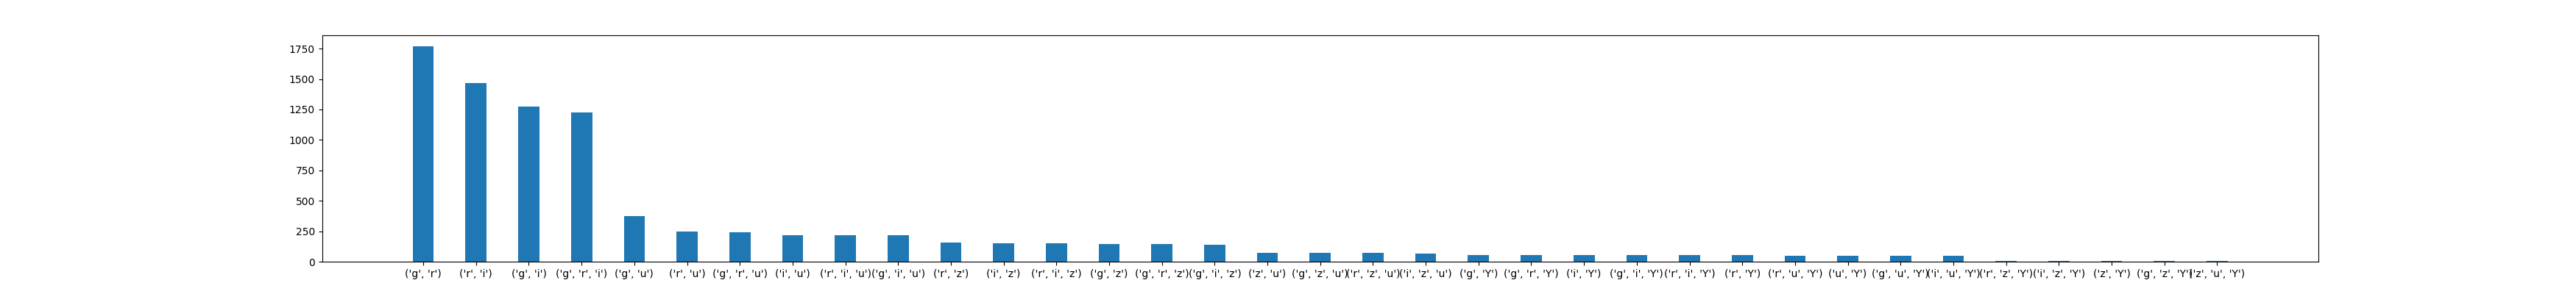

In [98]:
%matplotlib notebook
plt.figure(figsize=(35,4))
plt.bar(np.array(range(len(comb_counter)))*2, sorted(comb_counter.values(), reverse=True), tick_label=sorted(comb_counter, key=lambda x: comb_counter[x], reverse=True))
plt.show()

In [76]:
vals = np.array(list(comb_counter.values()))
keys = np.array(list(comb_counter.keys()))
thresh = 200
num_above_thresh = len(np.where(vals > thresh)[0])
print(num_above_thresh)
print(keys[np.where(vals > thresh)])

10
[('g', 'r') ('r', 'i', 'u') ('g', 'i') ('i', 'u') ('g', 'r', 'i')
 ('g', 'i', 'u') ('r', 'u') ('g', 'r', 'u') ('r', 'i') ('g', 'u')]
